# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
heart_disease = pd.read_csv("Data/Scikit-Learn/heart-disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create X (features matrix)
x = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
len(heart_disease), len(x_test),len(x_train)

(303, 61, 242)

In [8]:
# make a prediction
y_label = clf.predict(np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1]))

ValueError: Expected 2D array, got 1D array instead:
array=[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [10]:
clf.score(x_test,y_test)

0.819672131147541

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

NameError: name 'y_preds' is not defined

In [12]:
confusion_matrix(y_test,y_preds)

NameError: name 'y_preds' is not defined

In [13]:
accuracy_score(y_test,y_preds)

NameError: name 'y_preds' is not defined

In [14]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 81.97%

Trying model with 30 estimators...
Model accuracy on test set: 86.89%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 83.61%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 78.69%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%



In [15]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("Data/Scikit-Learn/random_forst_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("Data/Scikit-Learn/random_forst_model_1.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.8360655737704918

#  1. Getting the data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)
   

In [17]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.2
)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical¶





In [22]:
car_sales = pd.read_csv("Data/Scikit-Learn/car-sales-extended.csv")

In [23]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
 len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X/y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]


# Split into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [28]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [29]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [30]:
car_sales["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [31]:
car_sales["Colour"].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

So Colour, Make and Doors are categorical columns 

In [32]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [
        (
            "one_hot",
            one_hot,
            categorical_features
        )
    ],
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(x)

In [33]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
# Another way to do it with pd.dummies...
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [37]:
# Let's refit the model
x_train,x_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [39]:
model.score(x_test,y_test)

0.2330485230539474

## 1.2 What if there were missing values

    1. Fill them with some value (also known as imputation).
    2. Remove the samples with missing data altogether.


In [40]:
# Import car sales missing data
car_sale_miss = pd.read_csv("Data/Scikit-Learn/car-sales-extended-missing-data.csv")
car_sale_miss

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [41]:
car_sale_miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Create X & y
x = car_sale_miss.drop("Price", axis=1)
y = car_sale_miss["Price"]

In [43]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [
        (
            "one_hot",
            one_hot,
            categorical_features
        )
    ],
    remainder="passthrough"
)
transformed_X = transformer.fit_transform(x)

ValueError: Input contains NaN

In [44]:
car_sale_miss["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

#### Option 1: Fill missing data with Pandas


In [45]:
# Fill the "Make" column
car_sale_miss["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sale_miss["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sale_miss["Odometer (KM)"].fillna(car_sale_miss["Odometer (KM)"].mean(),inplace=True)


# Fill the "Doors" column
car_sale_miss["Doors"].fillna(4, inplace=True)


In [46]:
car_sale_miss

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
# Check our dataframe again
car_sale_miss.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# Remove rows with missing Price value
car_sale_miss.dropna(inplace=True)

In [49]:
# Check our dataframe again
car_sale_miss.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
len(car_sale_miss)

950

In [51]:
x = car_sale_miss.drop("Price", axis=1)
y = car_sale_miss["Price"]

In [52]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sale_miss)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Filling missing data and transforming categorical data with Scikit-Learn

The main takeaways:

   * Split your data first (into train/test)
   * Fill/transform the training set and test sets separately


In [53]:
# Import car sales missing data
car_sale_miss = pd.read_csv("Data/Scikit-Learn/car-sales-extended-missing-data.csv")
car_sale_miss

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
car_sale_miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
# Drop the rows with no labels
car_sale_miss.dropna(subset=["Price"],inplace=True)
car_sale_miss.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
len(car_sale_miss)

950

In [57]:
# Create X & y
x = car_sale_miss.drop("Price", axis=1)
y = car_sale_miss["Price"]


# Split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [58]:
# Check missing values
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [59]:
x_train

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0
...,...,...,...,...
106,Toyota,NaN,218803.0,4.0
277,BMW,Blue,245427.0,5.0
904,Toyota,White,196225.0,4.0
450,Honda,Blue,133117.0,NaN


In [60]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")


# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (something that fills missing data)
imputer = ColumnTransformer(
    [
        ("cat_imputer",cat_imputer,cat_features),
        ("door_imputer",door_imputer,door_feature),
        ("num_imputer",num_imputer,num_features)
    ]
)

# Fill train and test values separately
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

In [61]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()


Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# Check to see the original... still missing values
car_sale_miss.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [64]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed()
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)


0.20326483771313164

In [65]:

# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

Note: The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.

# 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

   * Classification - predicting whether a sample is one thing or another
   * Regression - predicting a number


   * Step 1 - Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
 

## 2.1 Picking a machine learning model for a regression problem


In [66]:
# Import Boston housing dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston;

In [67]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
# How many samples?
len(boston_df)

506

###### Let's try the Ridge Regression model


In [69]:
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate Ridge model
model = Ridge()
model.fit(x_train,y_train);


# Check the score of the Ridge model on test data
model.score(x_test,y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [70]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train);


# Check the score of the Ridge model on test data
model.score(x_test,y_test)

0.873969014117403

## 2.2 Choosing an estimator for a classification problem


Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [71]:
heart_disease = pd.read_csv("Data/Scikit-Learn/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC.

In [73]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)


/home/hatadmin/Documents/ML/sample_project/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [74]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [75]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use it to make predictions

## 3.1 Fitting the model to the data

Different names for:

* X = features, features variables, data
* y = labels, targets, target variables

In [76]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

In [77]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using.

* Random Forest Wikipedia
* Random Forest Wikipedia (simple version)
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen

## 3.2 Make predictions using a machine learning model

2 ways to make predictions:

1. predict()
2. predict_proba()

In [78]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [79]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [80]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [81]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
# Compare predictions to truth labels to evaluate the model
y_predic = clf.predict(x_test)
np.mean(y_predic == y_test)

0.8524590163934426

In [83]:
clf.score(x_test,y_test)

0.8524590163934426

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predic)

0.8524590163934426

Make predictions with predict_proba() - use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [85]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [86]:
# Let's predict() on the same data...
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

predict() can also be used for regression models.

In [87]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)


# Make predictions
y_preds = model.predict(X_test)



In [89]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [90]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [91]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.1226372549019623

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:

1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the score method

In [92]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

In [93]:
clf.score(x_train,y_train)

1.0

In [94]:
clf.score(x_test,y_test)

0.8524590163934426


Let's do the same but for regression..

In [95]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train);



In [96]:
model.score(x_test,y_test)

0.873969014117403

### 4.2 Evaluating a model using the scoring parameter

In [97]:
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
clf.score(x_test, y_test)

0.8524590163934426

In [99]:
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [100]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [101]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test,y_test)


# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Default scoring parameter of classifier = mean accuracy
`clf.score()`

In [102]:
# Scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [103]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
from sklearn.model_selection  import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv=5)
clf_cross_val_score

0.8248087431693989

In [105]:
np.mean(clf_cross_val_score)

0.8248087431693989

In [106]:

print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve


ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [107]:
# Create X_test... etc
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [108]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train,y_train)


# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [109]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:5]

array([0.49, 0.83, 0.49, 0.28, 0.57])

In [110]:
clf.predict(x_test)[:5]

array([0, 1, 0, 0, 1])

In [111]:
y_test[:5]

110    1
40     1
31     1
101    1
86     1
Name: target, dtype: int64

In [112]:
# Caculate fpr, tpr and thresholds
fpr, tpr, threshold= roc_curve(y_test,y_probs_positive)

# Caculate fpr, tpr and thresholds
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

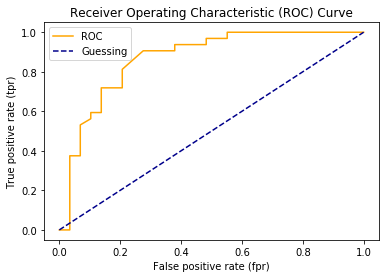

In [113]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    # Plot roc curve
    plt.plot(fpr,tpr,
             color="orange",
             label="ROC"
            )
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue", 
             linestyle="--",
             label="Guessing"
            )
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

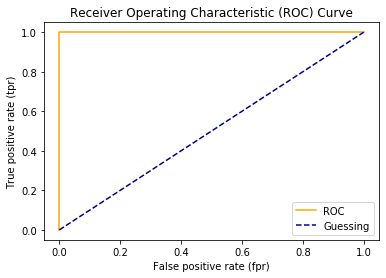

In [115]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threshold= roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [116]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.



In [117]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [118]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual Labels"],
    colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [119]:
# How install a conda package into the current envrionment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



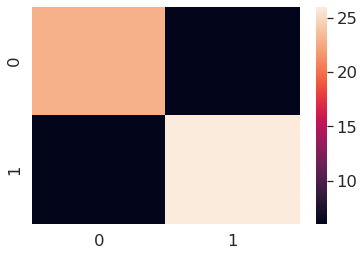

In [120]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

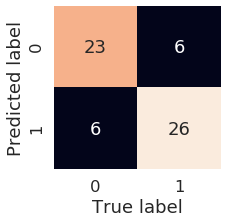

In [121]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax  = sns.heatmap(
        conf_mat,
        annot=True, #Annotate the boxes with conf_mat info
        cbar=False
    )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
    
plot_conf_mat(conf_mat)    
    

**Classification Report**

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [123]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/home/hatadmin/Documents/ML/sample_project/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

1. Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
2. Precision and recall become more important when classes are imbalanced.
3. If false positive predictions are worse than false negatives, aim for higher precision.
4. If false negative predictions are worse than false positives, aim for higher recall.
4. F1-score is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics¶


Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [124]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train);



In [125]:
model.score(x_test,y_test)

0.873969014117403

In [126]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
# y_test_mean

In [127]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test,y_test_mean)

0.0

In [128]:
# Model predicting perfectly the correct values gets an R^2 score of 1
r2_score(y_test,y_test)

1.0

**Mean absolue error (MAE)**

MAE is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are

In [129]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
MAN = mean_absolute_error(y_test,y_preds)
MAN

2.1226372549019623

In [130]:
df = pd.DataFrame(data={
    "actual": y_test,
    "predic":y_preds
})
df["difference"] = df["predic"] - df["actual"]


df["abs difference"] = abs(df["predic"] - df["actual"])
df

,actual,predic,difference,abs difference
173,23.6,23.002,-0.598,0.598
274,32.4,30.826,-1.574,1.574
491,13.6,16.734,3.134,3.134
72,22.8,23.467,0.667,0.667
452,16.1,16.853,0.753,0.753
...,...,...,...,...
412,17.9,13.030,-4.870,4.870
436,9.6,12.490,2.890,2.890
411,17.2,13.406,-3.794,3.794
86,22.5,20.219,-2.281,2.281


In [131]:
df["abs difference"].mean()

2.1226372549019623

**Mean squared error (MSE)**

In [132]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)

MSE = mean_squared_error(y_test,y_preds)
MSE

9.242328990196082

In [133]:
# Calculate MSE by hand
squared = np.square(df["abs difference"])
squared.mean()

9.242328990196082

### 4.2.3 Finally using the scoring parameter

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf  = RandomForestClassifier();


In [135]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [136]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')


The cross-validated accuracy is: 82.48%


In [137]:
# accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,scoring="accuracy")
np.mean(cv_acc)

0.8248087431693989

In [138]:
# Precision
cv_precision = cross_val_score(clf,x,y,scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [139]:
# Recall
cv_recall = cross_val_score(clf,x,y,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [140]:
#f1
cv_f1 = cross_val_score(clf,x,y,scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target" , axis=1);
y =  boston_df["target"]

model = RandomForestRegressor()

In [142]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [143]:
# Mean absolute error
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [144]:

# Mean squared error
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

### 4.3 Using different evalution metrics as Scikit-Learn functions


**Classification evaluation functions**

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [146]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


# 5. Improving a model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV`m

In [150]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.



We're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [174]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_disk = {
        "accuracy" : round(accuracy,2),
        "pression": round(precision,2),
        "recall": round(recall,2),
        "f1": round(f1,2)
    }
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_disk

In [176]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)


# Split into X & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

x_train, y_train = x[:train_split],y[:train_split]
x_valid, y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test , y_test = x[valid_split:],y[valid_split:]


clf = RandomForestClassifier()
clf.fit(x_train,y_train)


# Make baseline predictions
y_preds = clf.predict(x_valid)


# Evaluate the classifier on validation set
baseline_metrics  = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'pression': 0.81, 'recall': 0.88, 'f1': 0.85}

In [186]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=10,max_depth=1000)
clf_2.fit(x_train, y_train)


# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84
